# Crop Production Analysis in India : Project 7
### By Anwesha Baidya : UMIP13240

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Crop Production data.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
# Display basic statistics
data.describe(include='all')


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
count,246091,246091,246091.000000,246091,246091,2.460910e+05,2.423610e+05
unique,33,646,NaN,6,124,NaN,NaN
top,Uttar Pradesh,BIJAPUR,NaN,Kharif,Rice,NaN,NaN
freq,33306,945,NaN,95951,15104,NaN,NaN
mean,NaN,NaN,2005.643018,NaN,NaN,1.200282e+04,5.825034e+05
std,NaN,NaN,4.952164,NaN,NaN,5.052340e+04,1.706581e+07
min,NaN,NaN,1997.000000,NaN,NaN,4.000000e-02,0.000000e+00
25%,NaN,NaN,2002.000000,NaN,NaN,8.000000e+01,8.800000e+01
50%,NaN,NaN,2006.000000,NaN,NaN,5.820000e+02,7.290000e+02
75%,NaN,NaN,2010.000000,NaN,NaN,4.392000e+03,7.023000e+03


In [5]:
# Check for missing values
data.isnull().sum()


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
data['Production'] = data.groupby('Crop')['Production'].transform(lambda x: x.fillna(x.mean()))
data.isnull().sum()


State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [14]:
#Unique crops present in the dataset
len(data["Crop"].unique())

124

In [23]:
#Unique District_Name present in the dataset
len(data["District_Name"].unique())

646

In [25]:
#Frequency of crops present in the dataset
print(data['Crop'].value_counts())

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64


In [26]:
#Frequency of Season present in the dataset
print(data['Season'].value_counts())

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64


## EDA

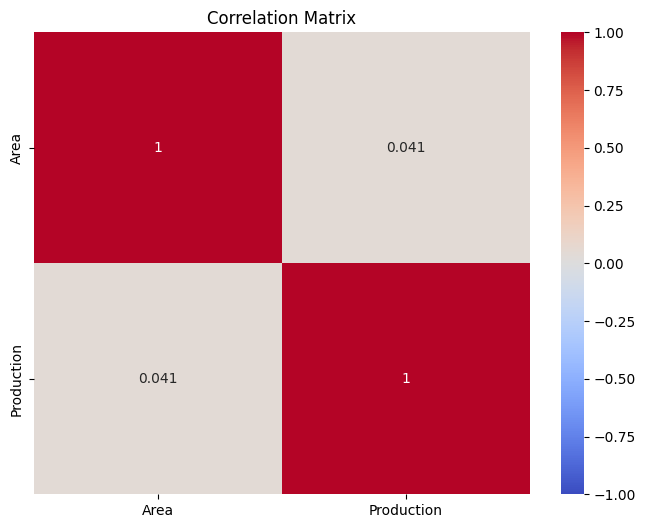

In [40]:
# Compute the correlation matrix
corr_matrix = data[['Area', 'Production']].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

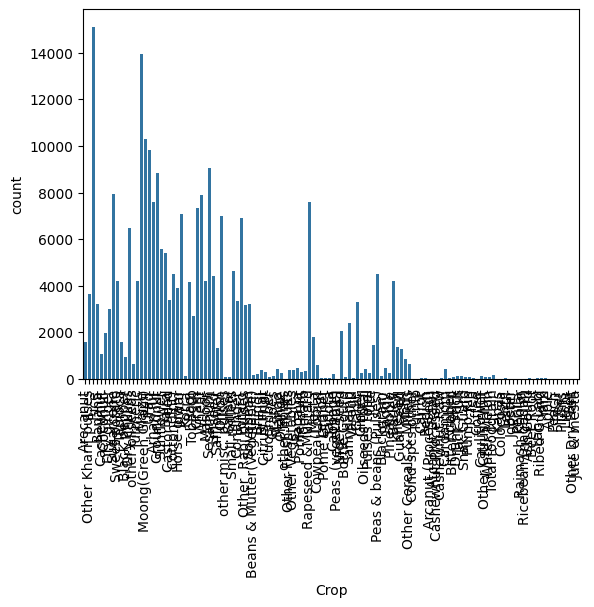

In [27]:
sns.countplot(data, x = "Crop")

plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='State_Name'>

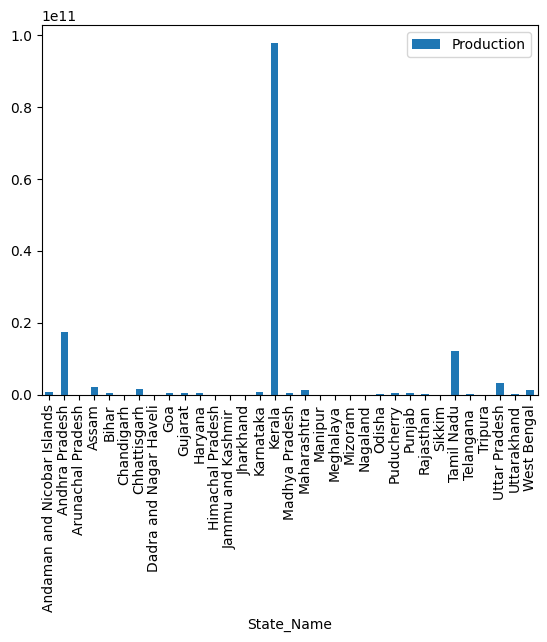

In [28]:
data.groupby(["State_Name"]).agg({"Production" : "sum"}).plot(kind = "bar")
#kerala has the highest production.

<Axes: xlabel='Crop'>

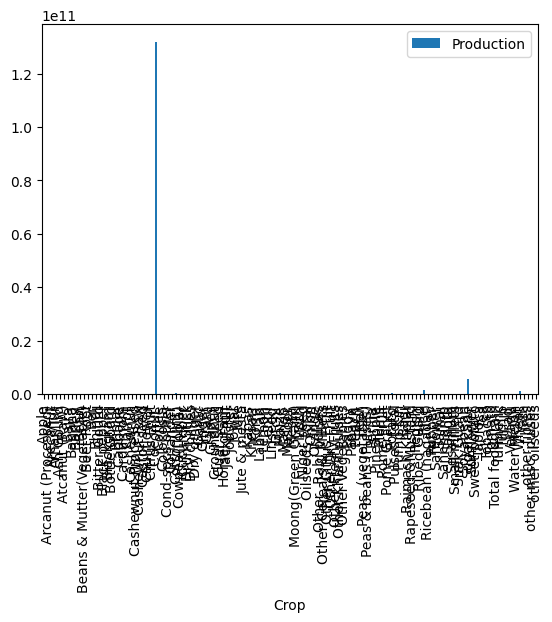

In [29]:
data.groupby(["Crop"]).agg({"Production" : "sum"}).plot(kind = "bar")
#cocunut is the highest produced.(look below)

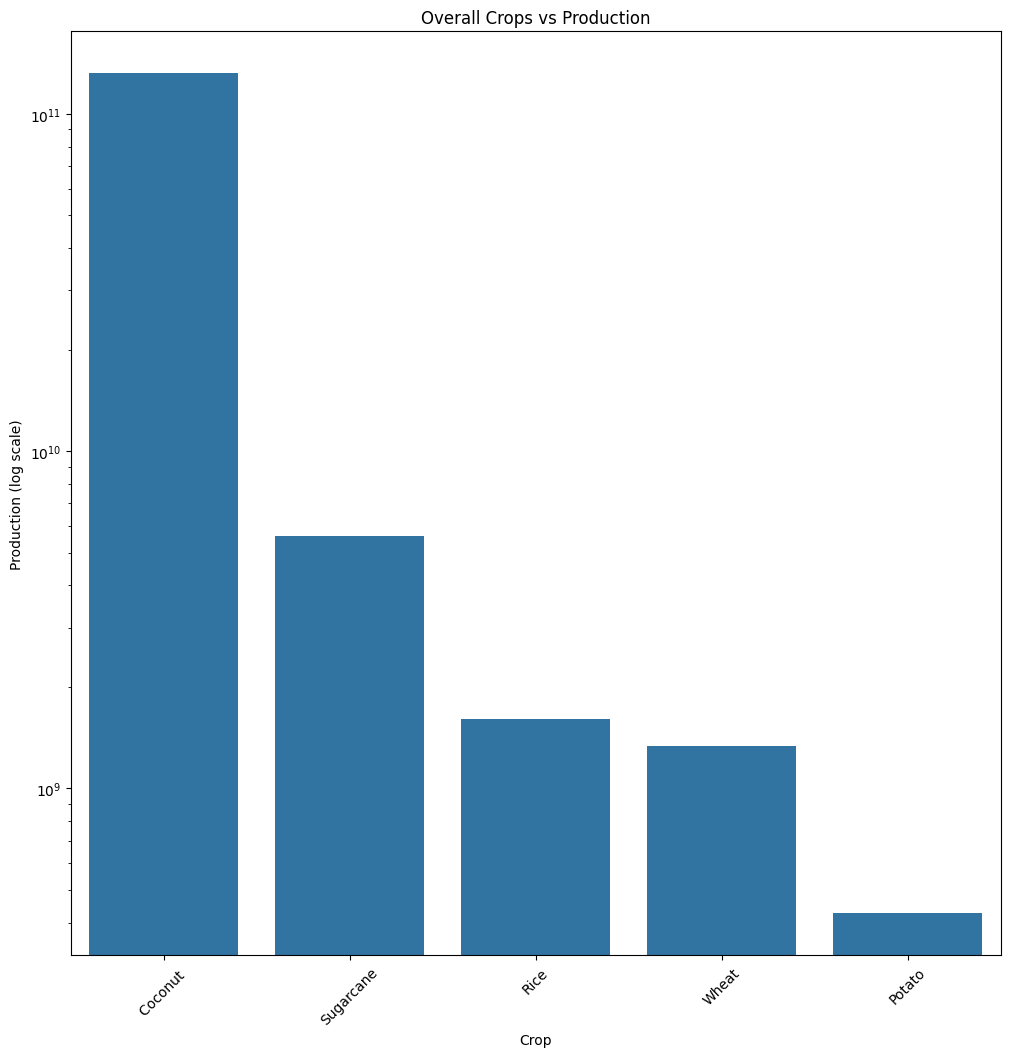

In [50]:
#cocunut is the highest produced.

# Group by 'Crop' and sum 'Production', then sort and take the top 5
crop = data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by="Production", ascending=False).head()

# Plotting the bar chart
plt.figure(figsize=(12, 12))
sns.barplot(x='Crop', y='Production', data=crop)
plt.yscale('log')
plt.title("Overall Crops vs Production")
plt.xlabel("Crop")
plt.ylabel("Production (log scale)")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Crop_Year'>

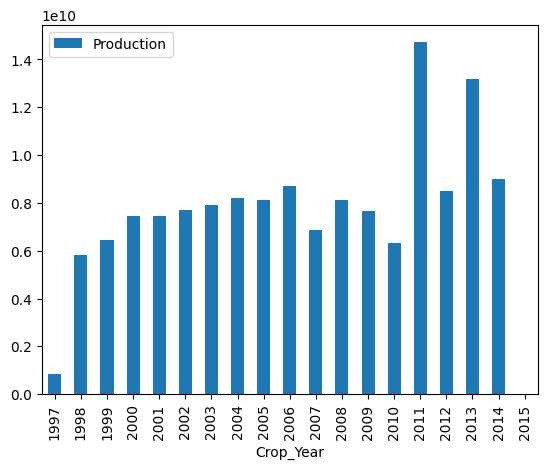

In [30]:
data.groupby(["Crop_Year"]).agg({"Production" : "sum"}).plot(kind = "bar")

<Axes: xlabel='Season'>

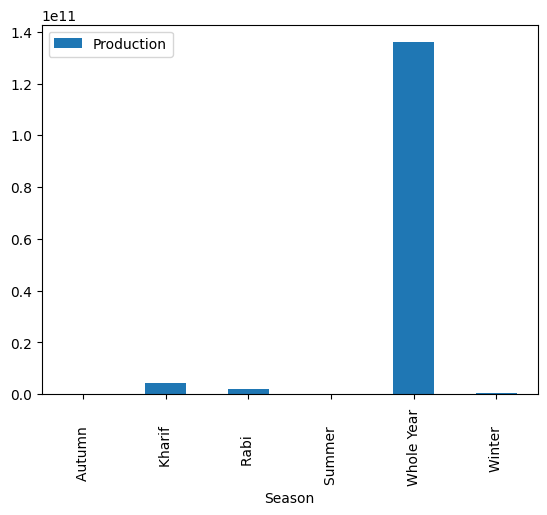

In [31]:
data.groupby(["Season"]).agg({"Production" : "sum"}).plot(kind = "bar")

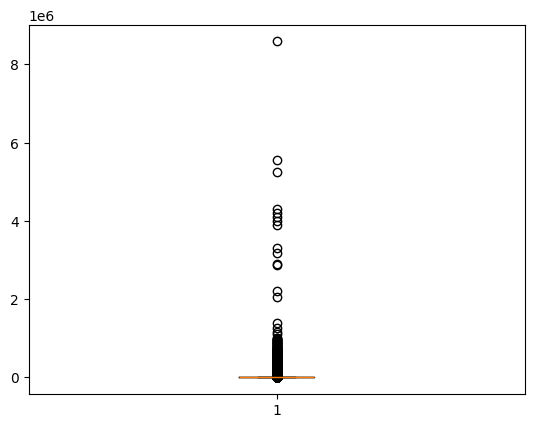

In [42]:
plt.boxplot(data.Area)
plt.show()

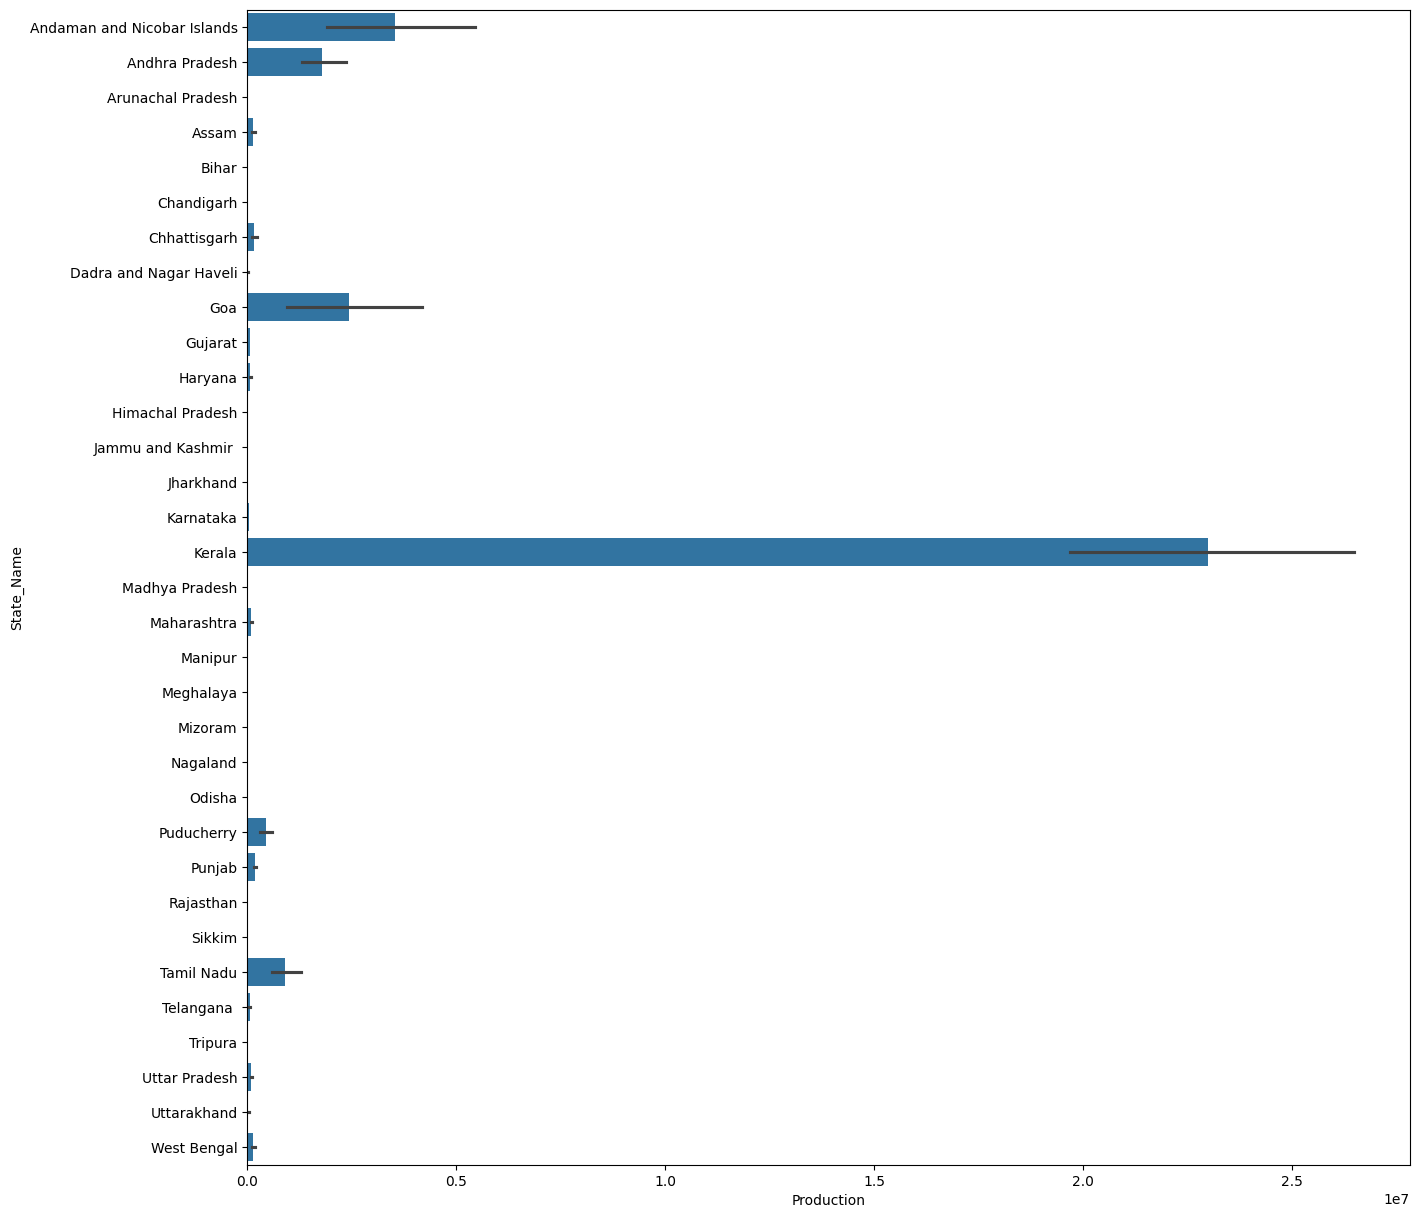

In [43]:
plt.figure(figsize=(15,15))
sns.barplot(y=data["State_Name"], x=data["Production"])
plt.show()

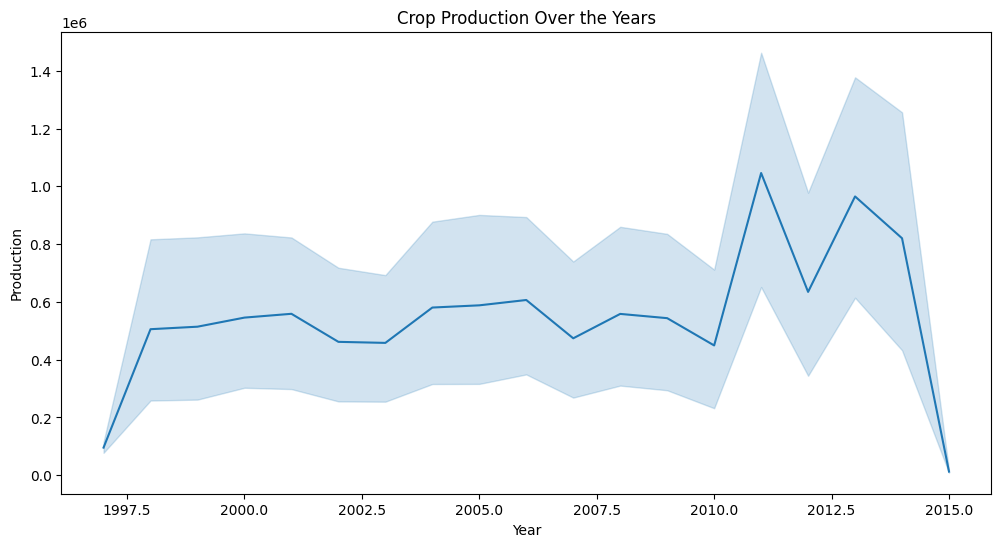

In [60]:
#Crop Production Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=data)
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

## Analysis

In [51]:
# Calculate yield
data['Yield'] = data['Production'] / data['Area']


In [56]:
# Total production by crop
total_production = data.groupby('Crop')['Production'].sum()
print("Total production by crop:")
print(total_production)

# Average yield by crop
average_yield = data.groupby('Crop')['Yield'].mean()
print("Average yield by crop:")
print(average_yield)


Total production by crop:
Crop
Apple                  0.000000e+00
Arcanut (Processed)    1.928310e+05
Arecanut               2.086253e+07
Arhar/Tur              3.986801e+07
Ash Gourd              0.000000e+00
                           ...     
Wheat                  1.336379e+09
Yam                    0.000000e+00
other fibres           0.000000e+00
other misc. pulses     9.704220e+03
other oilseeds         5.083085e+06
Name: Production, Length: 124, dtype: float64
Average yield by crop:
Crop
Apple                    0.000000
Arcanut (Processed)      1.284838
Arecanut                63.626048
Arhar/Tur               20.617902
Ash Gourd                0.000000
                          ...    
Wheat                  181.316578
Yam                      0.000000
other fibres             0.000000
other misc. pulses       0.243393
other oilseeds         117.818069
Name: Yield, Length: 124, dtype: float64


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
data['State_Name'] = le.fit_transform(data['State_Name'])
data['District_Name'] = le.fit_transform(data['District_Name'])
data['Crop'] = le.fit_transform(data['Crop'])
data['Season'] = le.fit_transform(data['Season'])

# Define features and target variable
X = data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']]
y = data['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train and predict using Linear Regression
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Train and predict using Random Forest
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f'Linear Regression MSE: {lr_mse}')
print(f'Random Forest MSE: {rf_mse}')


Linear Regression MSE: 159584231543132.78
Random Forest MSE: 27068175902221.504


In [65]:
from math import sqrt
print(f'Linear Regression RMSE: {sqrt(lr_mse)}')
print(f'Random Forest RMSE: {sqrt(rf_mse)}')

Linear Regression RMSE: 12632665.258888671
Random Forest RMSE: 5202708.515977183


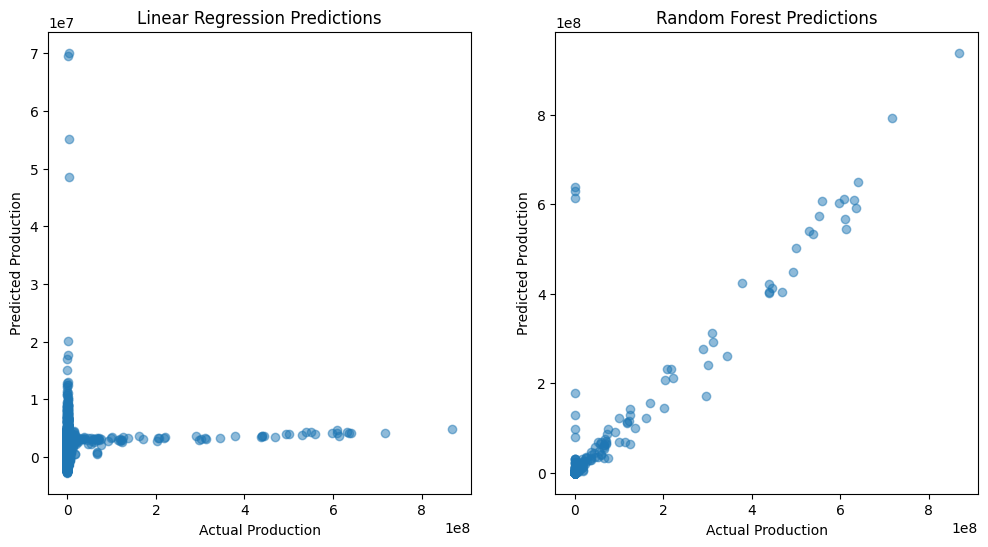

In [61]:
# Plot predictions vs actual values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Linear Regression Predictions')

# Plot predictions vs actual values for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Random Forest Predictions')

plt.show()
